Предложенная задача по определению автора на основе написанного текста подразумевает под собой задачу многоклассовой классификации. Для решения представленной задачи потребуется решить задачу обработки естественного языка (NLP). Попытаться решить эту задачу можно 3 способами: 
- С помощью применения трансформеров
- С помощью применения простой нейронной сети
- С помощью применения рекуррентных нейронных сетей

Для начала обратимся к архиву с файлами, содержащим предложенные для решения задачи данными.

Импортируем встроенный модуль ZipFile, посмотрим на количество содержащихся в архиве файлов, получим список файлов и распакуем архив в указанную директорию.

In [1]:
import zipfile

archive_path = r'./writerextnd.zip'

with zipfile.ZipFile(archive_path, 'r') as zip_data:
    zip_data.extractall(r'./extracted_writer_files')
    zip_data = zip_data.namelist()
    print(f'Содержание архива: {zip_data}\nКоличество файлов в архиве: {len(zip_data)}')

Содержание архива: ['Bradbury.txt', 'Bulgakov.txt', 'Fry.txt', 'Genri.txt', 'Simak.txt', 'Strugatskie.txt', 'author1.txt', 'author10.txt', 'author11.txt', 'author12.txt', 'author13.txt', 'author14.txt', 'author15.txt', 'author16.txt', 'author17.txt', 'author18.txt', 'author19.txt', 'author2.txt', 'author20.txt', 'author21.txt', 'author3.txt', 'author4.txt', 'author5.txt', 'author6.txt', 'author7.txt', 'author8.txt', 'author9.txt', 'example.csv']
Количество файлов в архиве: 28


Из описания данных задачи мы видим 6 файлов формата "Фамилия писателя".txt, каждый из которых содержит тексты соответствующих писателей, что представляет собой обучающую выборку для нашей модели, 1 пример ответа в формате .csv и 21 файл в формате .txt с неизвестным авторами - наша тестовая выборка.


Создадим словарь с обучающими и тестовыми данными и посмотрим на них, чтобы оценить содержимое. Нам интересен язык и соотношение количества текста для обучения и для тестирования. 

In [2]:
import os

path_to_files = './extracted_writer_files'
dict_data = {}

for text in zip_data:
    if text.endswith('.txt'):
        file_path = os.path.join(path_to_files, text)
        with open (file_path, 'r', encoding='utf-8') as file:
            text = text.removesuffix('.txt')
            file = file.read()
            dict_data[text] = file

for key in dict_data.keys():
    print(f'Пример текста: "{dict_data[key][0:10]}" автора {key}')

Пример текста: "﻿451° по Ф" автора Bradbury
Пример текста: "﻿Белая гва" автора Bulgakov
Пример текста: "﻿Власть не" автора Fry
Пример текста: "«Лиса-на-р" автора Genri
Пример текста: "﻿Всё живое" автора Simak
Пример текста: "Парень из " автора Strugatskie
Пример текста: "﻿К ее услу" автора author1
Пример текста: "﻿Он задрож" автора author10
Пример текста: "﻿Лягушка  " автора author11
Пример текста: "﻿ - Вы, сл" автора author12
Пример текста: "﻿     Но н" автора author13
Пример текста: "﻿ Нет  сом" автора author14
Пример текста: "﻿Их делали" автора author15
Пример текста: "﻿ Нет  ник" автора author16
Пример текста: "﻿Темные ва" автора author17
Пример текста: "﻿ Ну, это " автора author18
Пример текста: "﻿Так что д" автора author19
Пример текста: "﻿Из   боле" автора author2
Пример текста: "﻿Профессор" автора author20
Пример текста: "﻿Я  сказал" автора author21
Пример текста: "﻿     Одна" автора author3
Пример текста: "﻿В Петровс" автора author4
Пример текста: "﻿ Но Мэйзи" автора author5
П

Видим, что данные представлены на русском языке. Разделим словарь на train и test и посмотрим размерность.

In [3]:
train_data_dict = {}
len_train_data_dict = 0

test_data_dict = {}
len_test_data_dict = 0

for key in dict_data.keys():
    if key.startswith('author'):
        test_data_dict[key] = dict_data[key] 
        len_test_data_dict += len(test_data_dict[key])
    else:
        train_data_dict[key] = dict_data[key]
        len_train_data_dict += len(train_data_dict[key])

print(f'Общий размер тренировочных данных: {len_train_data_dict}\nОбщий размер тестовых данных: {len_test_data_dict}')

Общий размер тренировочных данных: 11553605
Общий размер тестовых данных: 116610


Посмотрим на распределение данных.

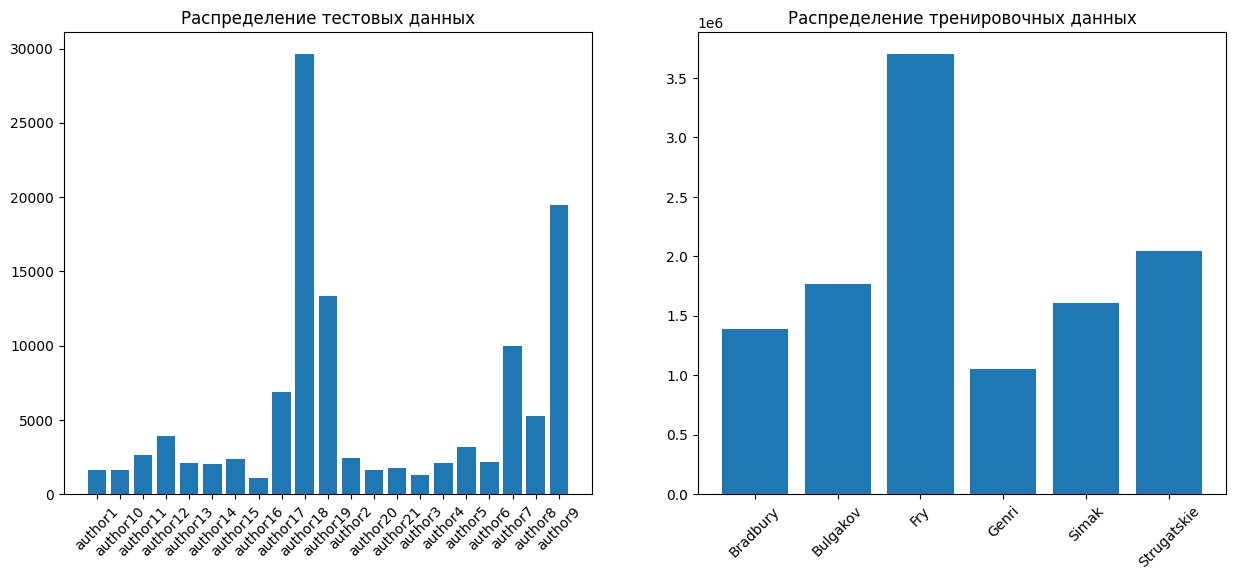

In [4]:
import matplotlib.pyplot as plt

Y_test = test_data_dict.keys()
X_test = [len(test_data_dict[key]) for key in test_data_dict]

Y_train = train_data_dict.keys()
X_train = [len(train_data_dict[key]) for key in train_data_dict]

plt.figure(figsize=(15, 6))

plt.subplot(1 , 2, 1)
plt.title('Распределение тестовых данных')
plt.bar(Y_test, X_test)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.title('Распределение тренировочных данных')
plt.bar(Y_train, X_train)
plt.xticks(rotation=45)
plt.show()

In [5]:
for key in dict_data.keys():
        print(f'{key}: {len(dict_data[key])}')

Bradbury: 1386454
Bulgakov: 1765648
Fry: 3700010
Genri: 1049517
Simak: 1609507
Strugatskie: 2042469
author1: 1629
author10: 1657
author11: 2633
author12: 3946
author13: 2090
author14: 2013
author15: 2354
author16: 1102
author17: 6869
author18: 29614
author19: 13314
author2: 2459
author20: 1620
author21: 1795
author3: 1323
author4: 2103
author5: 3207
author6: 2181
author7: 9949
author8: 5264
author9: 19488


Видим сильное (посимвольное) превалирование обучающих данных. Кроме того, меток классов для самопроверки на тестовых данных нет. Не очень хочется вручную искать авторов тестовых данных, а проверять работоспособность будущей модели все-таки нужно. Поэтому считаю целесообразным разделить тренировочную выборку дополнительно на валидационную. 

ВАРИАНТ 1. С полными текстами.

In [6]:
import re

fulltext_train_data_dict = {}

for key in train_data_dict.keys(): 
    preprocessed_text = train_data_dict[key]
    preprocessed_text = re.sub(r'[^а-яА-ЯёЁ\s.,!?:;\-—«»()"\'…]', '', preprocessed_text) # Убираем лишние буквы (на случай, если встречается другой язык, как в "Войне и Мир", например)
    preprocessed_text = re.sub(r'(?:\r?\n){2,}', ' ', preprocessed_text) # Избавляемся от 2 и более переносов строк
    fulltext_train_data_dict[key] = preprocessed_text

In [7]:
for key in fulltext_train_data_dict.keys():
    print(f'{key}, {len(fulltext_train_data_dict[key])}')
print(len(fulltext_train_data_dict.keys()), len(fulltext_train_data_dict.values()))

Bradbury, 1361142
Bulgakov, 1743543
Fry, 3656928
Genri, 1042246
Simak, 1595646
Strugatskie, 2016387
6 6


Не очень подходит, поскольку, по сути, будет лишь по 1 примеру для каждого автора. Стандартными методами разделить на train и valid не выйдет по этой же причине.

ВАРИАНТ 2. С разделенными текстами на подтексты.

Кроме того, несмотря на посимвольное превалирование обучающих данных, каждый пример представлен одним большим текстом. Считаю целесообразным разделить на более мелкие подтексты, чтобы увеличить количество примеров каждого класса для обучения будущей модели и чтобы была возможность корректно разделить случайным образом на валидационную и тренировочную выборки.

Для выполнения этой задачи, уже познакомившись с данными, удобнее будет работать в дальнейшем со списками для построения датасета.

In [8]:
import re

train_data = []
train_labels = []

for key in train_data_dict.keys():
    preprocessed_subtexts = train_data_dict[key]
    preprocessed_subtexts = re.sub(r'[^а-яА-ЯёЁ\s.,!?:;\-—«»()"\'…]', '', preprocessed_subtexts) # Убираем лишние буквы (на случай, если встречается другой язык, как в "Войне и Мир", например)
    preprocessed_subtexts = re.split(r'(?:\r?\n){2,}', preprocessed_subtexts) # Делим на подтексты, избавляясь от 2 и более переносов строк
    for pst in preprocessed_subtexts:
        if len(pst) > 100:
            train_data.append(pst.strip())
            train_labels.append(key)

In [9]:
# print(len(train_data), len(train_labels))
# print(train_data[::500], train_labels[::500])

2.1 С Dataset'ом от Hugging Face, предобученной моделью и токенизатором.

Создаем датасет.

In [10]:
from datasets import Dataset, Features, Value, ClassLabel

# Создаем словарь для датасета.
HF_train_data = {'labels': train_labels,
                 'texts': train_data}
# Сразу закодируем классы
label_names = list(train_data_dict.keys())
features = Features({'labels': ClassLabel(names=label_names),
                     'texts': Value('string')})

HF_train_ds = Dataset.from_dict(HF_train_data, features=features)
print(HF_train_ds)

c:\Users\Study and Work\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['labels', 'texts'],
    num_rows: 32649
})


Делим датасет на train и valid.

In [11]:
HF_splited_ds = HF_train_ds.train_test_split(test_size=0.2, shuffle=True, seed=42)
HF_splited_train_ds, HF_splited_valid_ds = HF_splited_ds['train'], HF_splited_ds['test']

print(HF_splited_train_ds, HF_splited_valid_ds)

Dataset({
    features: ['labels', 'texts'],
    num_rows: 26119
}) Dataset({
    features: ['labels', 'texts'],
    num_rows: 6530
})


Теперь необходимо выбрать модель и токенизировать тексты.

Пробовал один из классических вариантов от 'DeepPavlov/rubert-base-cased', но оказалась тяжеловата. Ввиду ограниченности ресурсов практически единственным вариантом остается 'cointegrated/rubert-tiny'.

In [12]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_name = 'cointegrated/rubert-tiny'

tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case = False)
transformer_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_names))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Создадим функцию токенизации, чтобы потом применить ее к датасету через map()

In [13]:
def tokenize_function(data):
    return tokenizer(
        data["texts"],
        padding='max_length',
        truncation=True,
        max_length = 512,
    )

HF_tokenized_train_dataset = HF_splited_train_ds.map(tokenize_function, batched=True)
HF_tokenized_valid_dataset = HF_splited_valid_ds.map(tokenize_function, batched=True)

Map:   0%|          | 0/26119 [00:00<?, ? examples/s]

Map: 100%|██████████| 6530/6530 [00:01<00:00, 3267.85 examples/s]


Создадим функцию подсчета метрик для валидационного датасета.

In [14]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    accuracy = accuracy_score(labels, predictions)
    return {'accuracy': accuracy}


Создаем TrainingArguments и Trainer для обучения модели.

In [15]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    greater_is_better=True,
    learning_rate=2e-5,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_strategy="epoch",
    weight_decay=0.01
)

trainer = Trainer(
    model=transformer_model,
    args=training_args,
    train_dataset=HF_tokenized_train_dataset,
    eval_dataset=HF_tokenized_valid_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

C:\Users\Study and Work\AppData\Local\Temp\ipykernel_23764\105771988.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.061000,0.682467,0.766769
2,0.597900,0.557397,0.813936
3,0.449600,0.490633,0.839663
4,0.376200,0.480818,0.847933
5,0.338300,0.485668,0.849923


TrainOutput(global_step=16325, training_loss=0.5646119023975881, metrics={'train_runtime': 1225.6897, 'train_samples_per_second': 106.548, 'train_steps_per_second': 13.319, 'total_flos': 963536847206400.0, 'train_loss': 0.5646119023975881, 'epoch': 5.0})

Построим график функции потерь и точности.

In [16]:
logs = trainer.state.log_history

epoch = []
loss = []
eval_loss = []
accuracy = []

priv_epoch = 0

for log in logs:
    if priv_epoch != log['epoch']:
        epoch.append(log['epoch'])
    if 'loss' in log:
        loss.append(log['loss'])
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])
    if 'eval_accuracy' in log:
        accuracy.append(log['eval_accuracy'])
    priv_epoch=log['epoch']

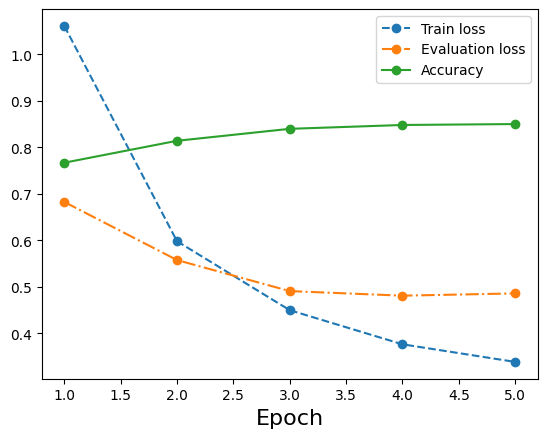

In [17]:
X = epoch
Y1 = loss
Y2 = eval_loss
Y3 = accuracy

plt.plot(X, Y1, label="Train loss", linestyle='--', marker='o')
plt.plot(X, Y2, label="Evaluation loss", linestyle='-.', marker='o')
plt.plot(X, Y3, label="Accuracy", marker='o' )
plt.xlabel('Epoch', fontsize=16)
plt.legend()
plt.show()



Видим, что после 3 эпохи точность практически перестала расти, ошибки обучения продолжали падать, а ошибки валидации практически не изменялись. Скорее всего пошло переобучение, но поскольку параметр training_args "load_best_model_at_end=True" - мы этого не сильно боимся, однако обучать дальше ту же модель считаю нецелесообразным.

Сделаем предсказание на тестовых данных.

In [18]:
import pandas as pd

HF_test_data = {'texts': list(test_data_dict.values())}

HF_test_ds = Dataset.from_dict(HF_test_data)
HF_tokenized_test_dataset = HF_test_ds.map(tokenize_function, batched=True)

HF_test_predictios = trainer.predict(HF_tokenized_test_dataset)
HF_logits = HF_test_predictios.predictions
HF_predicted_test_labels = np.argmax(HF_logits, axis=1)

HF_predictions = pd.DataFrame({"id": list(test_data_dict.keys()),
                               "label": HF_predicted_test_labels})


HF_predictions.to_csv('Transformers_predictions.csv', index = False)



Map: 100%|██████████| 21/21 [00:00<00:00, 477.28 examples/s]


2.2 С NN и tfidfvectorizer'ом от sklearn.